# Import libs & data

In [53]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from utils import utils
from sklearn.neighbors import KNeighborsRegressor
import sklearn

In [54]:
raw_df=pd.read_csv("./test_data_scientist/train.csv")
test_df=pd.read_csv("./test_data_scientist/test.csv")
bu_feat=pd.read_csv("./test_data_scientist/bu_feat.csv")
raw_df["day_id"]=pd.to_datetime(raw_df["day_id"])
raw_df.loc[231272,"turnover"]=np.mean([360.013595,364.825805,381.773418])
test_df["day_id"]=pd.to_datetime(test_df["day_id"])
limit=pd.to_datetime('2016-01-02')
train_df=raw_df[raw_df["day_id"]<=limit].reset_index(drop=True)
val_df=raw_df[raw_df["day_id"]>limit].reset_index(drop=True)

# Creating annual curve dataset

In [119]:
from dataset import dataset
from importlib import reload
reload(dataset)

<module 'dataset.dataset' from 'c:\\Users\\Edouard\\github\\DecathlonTest\\dataset\\dataset.py'>

In [108]:
deconv_ds_train=dataset.Annual_construction_dataset()
deconv_ds_val=dataset.Annual_construction_dataset()
deconv_ds_train.load_from_df(train_df,bu_feat)
deconv_ds_val.load_from_df(val_df,bu_feat)

100%|██████████| 322/322 [00:07<00:00, 42.51it/s]


In [73]:
with open('data_deconv_train.json', 'w') as f:
    deconv_ds_train.save_ds_to_json(f)
with open('data_deconv_val.json', 'w') as f:
    deconv_ds_val.save_ds_to_json(f)

In [109]:
deconv_ds_train=dataset.Annual_construction_dataset()
with open('data_deconv_train.json', 'r') as f:
    deconv_ds_train.load_from_json(f)
deconv_ds_val=dataset.Annual_construction_dataset()
with open('data_deconv_val.json', 'r') as f:
    deconv_ds_val.load_from_json(f)

In [110]:
deconv_ds_train.set_data_for_training(False)
deconv_ds_val.set_data_for_training(False)

# Creating Turnover Dataset

In [121]:
params={
    73:[9,np.array([2/3,0,1/3])],
    88:[8,np.array([2/3,0,1/3])],
    117:[6,np.array([1,0,1])],
    127:[4,np.array([2/3,0,1])]    
}
dic_knn={
    73:None,
    88:None,
    117:None,
    127:None
}
for dep in params.keys():
    X_train=[]
    Y_train=[]
    X_val=[]
    Y_val=[]
    for sample in deconv_ds_train.samples_per_dep[dep]:
        Y_train.append(sample[0])
        X_train.append(sample[1])
    X_train=np.array(X_train)
    Y_train=np.array(Y_train)
    for sample in deconv_ds_val.samples_per_dep[dep]:
        Y_val.append(sample[0])
        X_val.append(sample[1])
    X_val=np.array(X_val)
    Y_val=np.array(Y_val)
    dic_knn[dep] = KNeighborsRegressor(n_neighbors=params[dep][0],weights='distance',n_jobs=-1,metric=lambda a,b:utils.custom_distance(a,b,params[dep][1])).fit(X_train, Y_train)

In [122]:
ds_train=dataset.Turnover_dataset(dic_knn)
ds_val=dataset.Turnover_dataset(dic_knn)

In [123]:
ds_train.load_from_df(train_df,bu_feat)
ds_val.load_from_df(val_df,bu_feat)

100%|██████████| 322/322 [15:56<00:00,  2.97s/it]


In [125]:
with open('train_data.json', 'w') as f:
    ds_train.save_ds_to_json(f)
with open('val_data.json', 'w') as f:
    ds_val.save_ds_to_json(f)

In [101]:
ds_train=dataset.Turnover_dataset(None)
ds_val=dataset.Turnover_dataset(None)
with open('train_data.json', 'r') as f:
    ds_train.load_from_json(f)
with open('val_data.json', 'r') as f:
    ds_val.load_from_json(f)
ds_train.set_data_for_training(False)
ds_val.set_data_for_training(False)

# Visualization

In [ ]:
train_df=train_df.join(train_df["day_id"].dt.isocalendar())

In [87]:
n=3600
bu=ds_train.samples[n]["bu_num"]
dep=ds_train.samples[n]["dep"]
day_id=ds_train.samples[n]["day_id"]
print(bu,dep,day_id)

454 117 2014-09-06 00:00:00


In [88]:
train_df[(train_df["day_id"]>=day_id) 
    & (train_df["day_id"]<=(day_id+pd.DateOffset(weeks=23)))
    & (train_df["but_num_business_unit"]==bu) 
    & (train_df["dpt_num_department"]==dep)]

,index,day_id,but_num_business_unit,dpt_num_department,turnover,year,week,day
50353,160161,2015-02-14,454,117,1613.140533,2015,7,6
51378,161186,2015-02-07,454,117,2566.357700,2015,6,6
52385,162193,2015-01-31,454,117,2325.086308,2015,5,6
53750,163558,2015-01-24,454,117,2035.472484,2015,4,6
54845,164653,2015-01-17,454,117,1323.016978,2015,3,6
56143,165951,2015-01-10,454,117,2187.949350,2015,2,6
56689,166497,2015-01-03,454,117,4764.469886,2015,1,6
57981,167789,2014-12-27,454,117,2414.525846,2014,52,6
59177,168985,2014-12-20,454,117,1540.124780,2014,51,6
60129,169937,2014-12-13,454,117,2087.993342,2014,50,6


In [89]:
np.max(train_df[(train_df["day_id"]>=day_id) 
    & (train_df["day_id"]<=(day_id+pd.DateOffset(weeks=23)))
    & (train_df["but_num_business_unit"]==bu) 
    & (train_df["dpt_num_department"]==dep)]["turnover"])

4764.469886136026

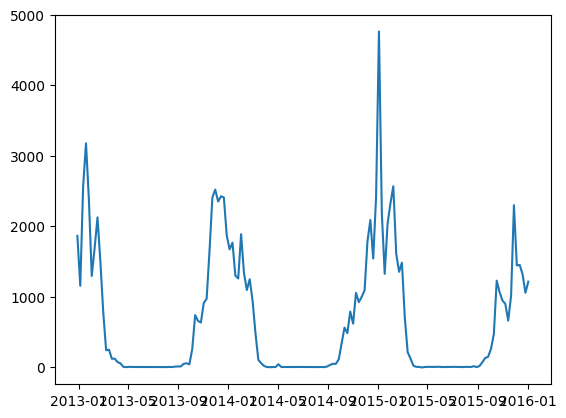

In [91]:
plt.plot(train_df[(train_df["but_num_business_unit"]==bu) 
    & (train_df["dpt_num_department"]==dep)]["day_id"].to_numpy()[::-1],train_df[(train_df["but_num_business_unit"]==bu) 
    & (train_df["dpt_num_department"]==dep)]["turnover"].to_numpy()[::-1])

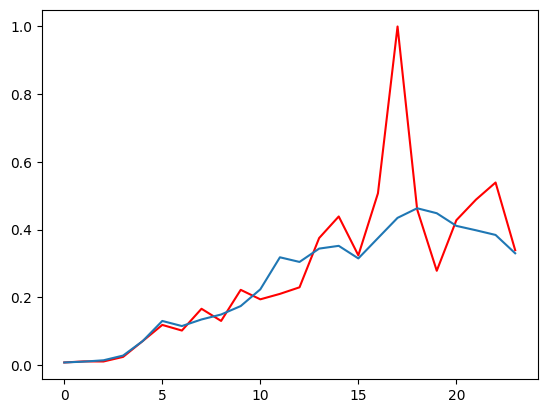

In [83]:
n=3600
plt.plot(np.concatenate((ds_train.samples[n]["seq_x"],ds_train.samples[n]["seq_y"])),color='red')
plt.plot(np.concatenate((ds_train.samples[n]["annual_slice_x"],ds_train.samples[n]["annual_slice_y"])))
plt.show()

# Tests

In [ ]:
raw_df[raw_df["but_num_business_unit"]==131]

In [ ]:
bu_1=95
bu_2=4
limit=pd.to_datetime('2017-09-30')-pd.DateOffset(weeks=7)
past_data=raw_df[((raw_df["but_num_business_unit"]==bu_1) + (raw_df["but_num_business_unit"]==bu_2)) & (raw_df["day_id"]<limit)]
pred_data=raw_df[((raw_df["but_num_business_unit"]==bu_1) + (raw_df["but_num_business_unit"]==bu_2)) & (raw_df["day_id"]>=limit)]
past_data.to_csv("./test_data_scientist/past_data.csv",index=False)
pred_data.to_csv("./test_data_scientist/prediction_data.csv",index=False)

In [ ]:
bu_s=95
dep_s=73
past_data[(past_data["but_num_business_unit"]==bu_s) 
            & (past_data["dpt_num_department"]==dep_s) 
            & (past_data["day_id"]>=(pd.to_datetime('2017-08-05')-pd.DateOffset(weeks=15)))
            ].sort_values(by=["day_id"]).reset_index(drop=True)

In [ ]:
x=past_data[(past_data["but_num_business_unit"]==bu_s) 
            & (past_data["dpt_num_department"]==dep_s) 
            & (past_data["day_id"]>=(pd.to_datetime('2017-08-05')-pd.DateOffset(weeks=15)))
            ].sort_values(by=["day_id"]).reset_index(drop=True)["turnover"].to_numpy()
plt.plot(np.concatenate((x,pred_data[(pred_data["but_num_business_unit"]==bu_s)
                        & (pred_data["dpt_num_department"]==dep_s)
            ].sort_values(by=["day_id"]).reset_index(drop=True)["turnover"].to_numpy())))

In [ ]:
plt.plot(past_data[(past_data["but_num_business_unit"]==bu_s) 
            & (past_data["dpt_num_department"]==dep_s)]["turnover"])